# Morphological features of 3D models

This notebook demonstrates the calculation of morphological features of 3D reconstructed model, including length, surface area, volume, cell density, cell distribution, etc.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import spateo as st

2023-07-25 12:25:01.846617: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load the data


In [2]:
cpo = [(553, 1098, 277), (1.967, -6.90, -2.21), (0, 0, 1)]

adata = st.sample_data.drosophila(filename="E7-9h_cellbin.h5ad")
adata.uns["__type"] = "UMI"
adata

AnnData object with n_obs × n_vars = 25921 × 8136
    obs: 'area', 'slices', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage'
    uns: '__type'
    obsm: '3d_align_spatial'
    layers: 'counts_X', 'spliced', 'unspliced'

## Reconstruct the mesh model corresponding to the 3D spatial transcriptomics data

See also [3D Reconstruction](./3D%20Reconstruction.ipynb) for more details on 3D reconstructed models.

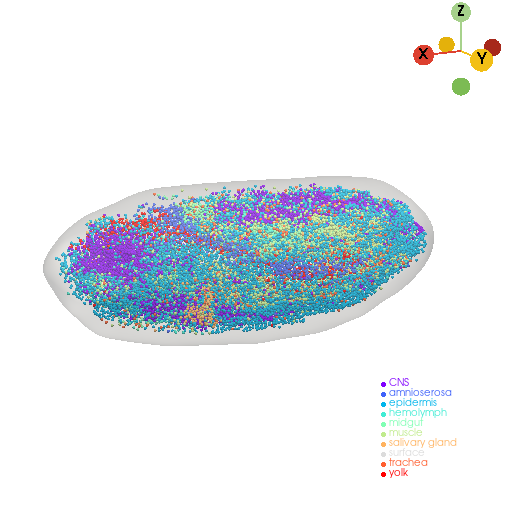

In [25]:
# Reconstruct point cloud model
pc, plot_cmap = st.tdr.construct_pc(adata=adata.copy(), spatial_key="3d_align_spatial", groupby="anno_tissue")

# Reconstruct mesh model
mesh, _, _ = st.tdr.construct_surface(pc=pc, alpha=0.3, cs_method="marching_cube", cs_args={"mc_scale_factor": 1.8}, smooth=8000, scale_factor=1.0)

# Visualization
st.pl.three_d_plot(model=st.tdr.collect_models([pc, mesh]), key="groups", model_style=["points", "surface"], jupyter="static", cpo=cpo)

## Calculate the cells' kernel density of drosophila embryo

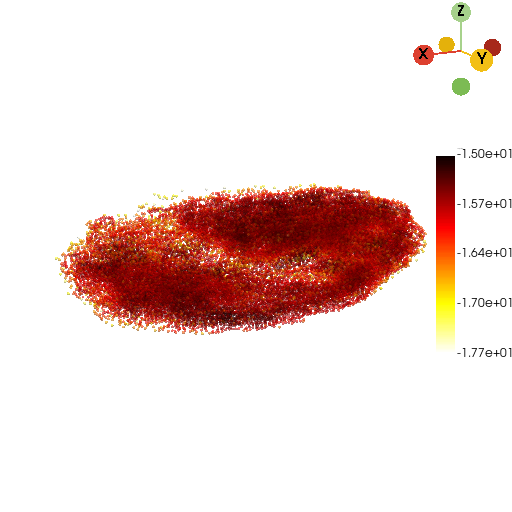

In [27]:
st.tdr.pc_KDE(pc=pc, bandwidth=5, key_added="cells_kde", colormap="hot_r", inplace=True)
st.pl.three_d_plot(model=pc, key="cells_kde", colormap="hot_r", opacity=0.6, model_style="points", jupyter="static", cpo=cpo)

## Calculate the volume, surface area, length, etc. of drosophila embryo

The coordinates in anndata need a unified unit, such as all coordinates are in microns

In [32]:
um_pc_model, um_mesh_model = pc.copy(), mesh.copy()

um_pc_model.points = um_pc_model.points / 1000
um_mesh_model.points = um_mesh_model.points / 1000

In [33]:
morph = st.tdr.model_morphology(model=um_mesh_model, pc=um_pc_model)
morph

|-----> Length (x) of model: 0.54292;
|-----> Width (y) of model: 0.23302;
|-----> Height (z) of model: 0.20113;
|-----> Surface area of model: 0.3212;
|-----> Volume of model: 0.01364;
|-----> Volume / surface area ratio of model: 0.04247.
|-----> Cell density of model: 1900366.56891.


{'Length(x)': 0.54292,
 'Width(y)': 0.23302,
 'Height(z)': 0.20113,
 'Surface_area': 0.3212,
 'Volume': 0.01364,
 'V/SA_ratio': 0.04247,
 'cell_density': 1900366.56891}